Importing required libraries

In [ ]:
import numpy as np #use for arrays manipulation
import pandas as pd  #data manipulation
%matplotlib inline
import matplotlib as mpl #plots
import matplotlib.pyplot as plt #plots


In [ ]:
import tensorflow as tf #machine learning tasks
from tensorflow import keras #neural network library to train model

Now we will import datasets from kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadsaqibkayani","key":"1ade948c154723047f645a91c046e99d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Now after creating directory for kaggle lets import/download datasets

In [ ]:
!kaggle datasets download -d artakusuma/basedir

100% 5.50G/5.50G [02:18<00:00, 76.6MB/s]
100% 5.50G/5.50G [02:18<00:00, 42.5MB/s]


We have downlaoded zip file named as "/content/basedir.zip". Now let's extract it

In [ ]:
from zipfile import ZipFile
file_name='/content/basedir.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done extraction..')

done extraction..


storing location of data into files

In [ ]:
train_dir = '/content/base_dir/train_dir' 
validation_dir = '/content/base_dir/val_dir' 

**Data PreProcessing:**
* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), #150  x 150 pixels
        batch_size=80, 
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
label_map = (train_generator.class_indices)
label_map

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))  #32 filters
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Flatten())
 
model.add(layers.Dense(512, activation='relu'))
 
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

now, compile the model

In [ ]:
from tensorflow.keras import optimizers
 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

Run the model for training

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=482 , #38569/80
      epochs=20,
      validation_data=validation_generator,
      validation_steps=46,
      callbacks=[checkpoint_cb]
       )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
482/482 [==============================] - 118s 245ms/step - loss: 1.2351 - acc: 0.5187 - val_loss: 0.7714 - val_acc: 0.7087
Epoch 2/20
482/482 [==============================] - 118s 245ms/step - loss: 1.0764 - acc: 0.5848 - val_loss: 0.5395 - val_acc: 0.8120
Epoch 3/20
482/482 [==============================] - 118s 245ms/step - loss: 0.9899 - acc: 0.6185 - val_loss: 0.5754 - val_acc: 0.7891
Epoch 4/20
482/482 [==============================] - 118s 245ms/step - loss: 0.9256 - acc: 0.6482 - val_loss: 0.5228 - val_acc: 0.8174
Epoch 5/20
482/482 [==============================] - 118s 245ms/step - loss: 0.8682 - acc: 0.6666 - val_loss: 0.4879 - val_acc: 0.8261
Epoch 6/20
482/482 [==============================] - 118s 244ms/step - loss: 0.8205 - acc: 0.6860 - val_loss: 0.5106 - val_acc: 0.8120
Epoch 7/20
482/482 [==============================] - 118s 245ms/step - loss: 0.7804 - acc: 0.7019 - val_loss: 0.4400 - val_acc: 0.8424
Epoch 8/20
482/482 [============================

Visualizing results

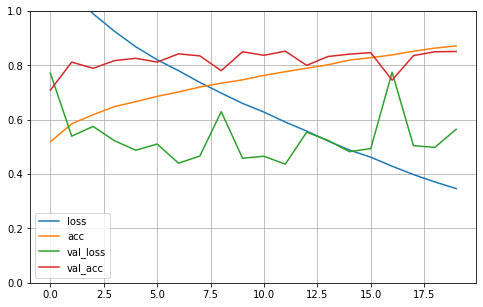

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Saving the model

In [ ]:
model.save("myNewmodel.h5")